# vehicle least norm

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## problem formulation

In [2]:
def geo_sum(a1, r, n: int) -> float:
    return a1 * (1 - r ** n) / (1 - r)

In [3]:
n = 20
a = np.zeros((3, n * 2))

infl1, infl2 = 0.1, 0.2
fric1, fric2 = 0.95, 0.8

for i in range(n):
    a[1][i] = fric1 ** (n - 1 - i) * infl1  # s1(20) = 0
    a[2][i] = fric2 ** (n - 1 - i) * infl2  # s2(20) = 0

    if i == n - 1:
        continue

    a[0][i] = geo_sum(infl1, fric1, n - i - 1)
    a[0][n + i] = -geo_sum(infl2, fric2, n - i - 1)

b = np.array([1, 0, 0])

## solving it

literally just two lines lol

In [4]:
sol = np.linalg.lstsq(a, b)[0]
u, v = sol[:n], sol[n:]

print(a @ sol)

[ 1.00000000e+00 -2.49366500e-18  6.50521303e-18]


## plotting the result

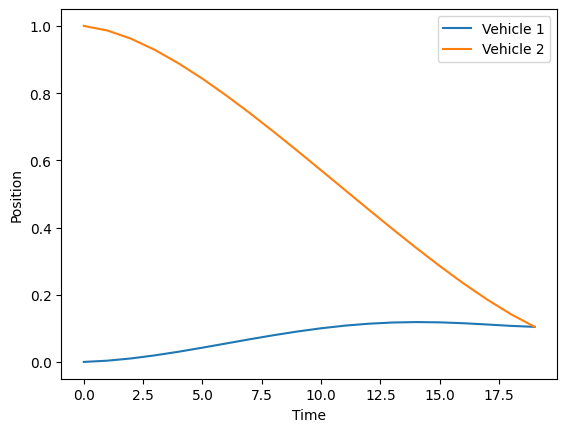

In [5]:
pos1, pos2 = [0 for _ in range(n)], [1 for _ in range(n)]

for i in range(n):
    for j in range(i):
        pos1[i] += u[j] * geo_sum(infl1, fric1, i - j)
        pos2[i] += v[j] * geo_sum(infl2, fric2, i - j)

time = np.arange(n)
plt.plot(time, pos1, label="Vehicle 1")
plt.plot(time, pos2, label="Vehicle 2")
plt.xlabel("Time")
plt.ylabel("Position")
plt.legend()